# Jobsheet 02 - Regression

Isikan identitas berikut<br>
NIM: 2041720049<br>
Nama: Cintya Aprila Fandini<br>
Kelas: TI-3H

## Tujuan
1. Mahasiswa mampu menjelaskan konsep regresi
2. Mahasiswa mampu menerapkan konsep regresi untuk kasus prediksi data

## Kegiatan Praktikum

Kegiatan praktikum ini membutuhkan dataset untuk diolah datanya menjadi sebuah analisis prediksi. Ikuti petunjuk dari dosen pengampu mengenai data apa saja yang boleh dipakai untuk kegiatan praktikum kali ini. Data yang ditampilkan pada jobsheet hanya sebuah contoh, mahasiswa harus mencari data sendiri dan memastikan data yang diperoleh tersebut sesuai dengan kasus yang dapat diselesaikan dengan regresi.

### Persiapan Data

In [31]:
# import package
import numpy as np
import pandas as pd

In [32]:
# baca data
data = pd.read_csv('ds_salaries.csv')
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [33]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


### Visualisasi Data

In [35]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

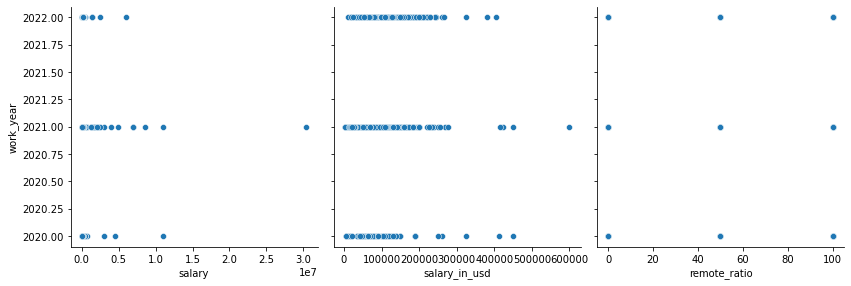

In [90]:
# operasi visualisasi
sns.pairplot(data, x_vars=['salary', 'salary_in_usd','remote_ratio'], 
             y_vars='work_year', height=4, aspect=1, kind='scatter')
plt.show()

output di atas kurang bisa menunjukkan korelasi antar data dalam x dengan data dalam y. Salah satu solusinya adalah menggunakan heatmap

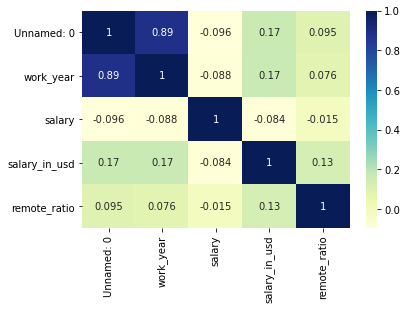

In [91]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

dari bentuk visualisasi di atas terlihat bahwa Length of Membership memiliki korelasi yang paling kuat terhadap Yearly Amount Spent

### Regresi Linier

In [166]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = data['salary']
y = data['salary_in_usd']

In [167]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)


In [168]:
# hasil training dtaset
X_train
y_train

479    120000
410     71982
206    200000
62      21669
50       6072
        ...  
578    100000
53      54742
350    161342
79      80000
520     69336
Name: salary_in_usd, Length: 424, dtype: int64

In [169]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

In [170]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const     110707.229950
salary        -0.003481
dtype: float64

In [171]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.370
Date:                Mon, 12 Sep 2022   Prob (F-statistic):             0.0671
Time:                        16:26:09   Log-Likelihood:                -5326.9
No. Observations:                 424   AIC:                         1.066e+04
Df Residuals:                     422   BIC:                         1.067e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.107e+05   3432.607     32.252      0.000    1.04e+05    1.17e+05
salary        -0.0035      0.002     -1.836      0.067      -0.007       0.000
==============================================================================
Omnibus:                      179.748   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1154.823
Skew:                           1.692   Prob(JB):                    1.71e-251
Kurtosis:                      10.343   Cond. No.                     1.85e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

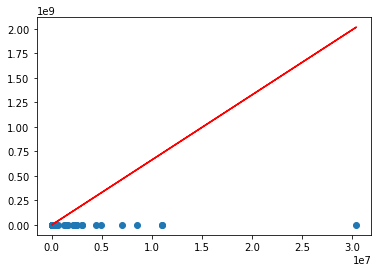

In [172]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

### Residual Analysis
dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y)

Error = Actual y value - y predicted value

In [173]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

c:\Users\cinty\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


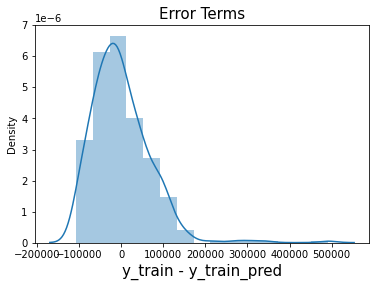

In [174]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

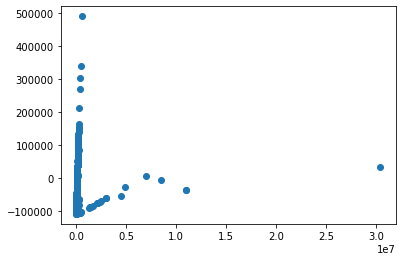

In [175]:
plt.scatter(X_train,res)
plt.show()

In [176]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

379    110192.732547
326    110254.695022
154    110205.960491
574    109976.211989
312    110602.798812
dtype: float64

In [177]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

-0.01057493524931874

perlu diperhatikan bahwa r^2 dari data trainign adalah 0.669 sedangkan dari data testing adalah 0,612. Hal ini berarti model yang dibentuk cukup stabil (tidak berselisih jauh antara training dengan testing)

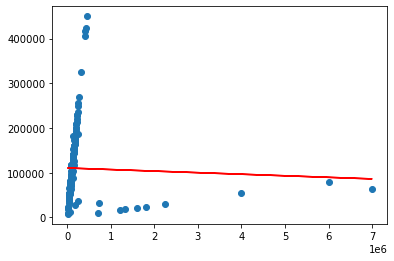

In [178]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

# linear Ganda


In [181]:
# define x1 x2 dan y
# untuk regresi linier berganda pada kasus kali ini, selain Length Of Membership sebagai X1 dan Yearly Amount Spent sebagai 
xbaru = data[['remote_ratio']]
ybaru = data['work_year']

In [182]:
#define konstanta pada x
xConst = sm.add_constant(xbaru)

In [183]:
model = sm.OLS(ybaru, xConst).fit()
predictions = model.predict(xConst)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              work_year   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.544
Date:                Mon, 12 Sep 2022   Prob (F-statistic):             0.0602
Time:                        16:45:23   Log-Likelihood:                -635.66
No. Observations:                 607   AIC:                             1275.
Df Residuals:                     605   BIC:                             1284.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2021.3133      0.056   3.59e+04   

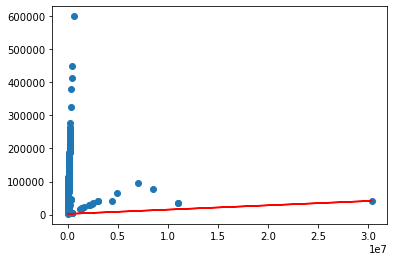

In [187]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 2021.3133 + 0.0013*X_train, 'r')
plt.show()